In [1]:
#import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_excel('data_final.xlsx')

In [3]:
data.head()

state   location  \
0  Andhra Pradesh  Hyderabad   
1  Andhra Pradesh  Hyderabad   
2  Andhra Pradesh  Hyderabad   
3  Andhra Pradesh  Hyderabad   
4  Andhra Pradesh  Hyderabad   

                         location_monitoring_station  \
0  C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...   
1  C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...   
2  C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...   
3  C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...   
4  C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...   

                                    agency  \
0  Andhra Pradesh  Pollution Control Board   
1  Andhra Pradesh  Pollution Control Board   
2  Andhra Pradesh  Pollution Control Board   
3  Andhra Pradesh  Pollution Control Board   
4  Andhra Pradesh  Pollution Control Board   

                                 type  so2   no2   rspm    spm  pm2_5  ...  \
0  Residential, Rural and other Areas  4.8  17.4  143.7  133.0   35.0  ...   
1                     Industrial Area  3.1   7.0  143.7  133.0   35.0  ...   
2  Residential, Rural and other Areas  6.2  28.5  143.7  133.0   35.0  ...   
3  Residential, Rural and other Areas  6.3  14.7  143.7  133.0   35.0  ...   
4                     Industrial Area  4.7   7.5  143.7  133.0   35.0  ...   

  NO2_24hr_avg  RSPM_24hr_avg  PM2.5_SubIndex  SPM_SubIndex  SO2_SubIndex  \
0      20.0625          84.25            50.0          35.0     16.233974   
1      20.0625          84.25            50.0          35.0     16.233974   
2      20.0625          84.25            50.0          35.0     16.233974   
3      20.0625          84.25            50.0          35.0     16.233974   
4      20.0625          84.25            50.0          35.0     16.233974   

   NOx_SubIndex  RSPM_SubIndex  Checks  AQI_calculated  AQI_bucket_calculated  
0     24.950321     481.320755       0            50.0                   Good  
1     24.950321     481.320755       0            50.0                   Good  
2     24.950321     481.320755       0            50.0                   Good  
3     24.950321     481.320755       0            50.0                   Good  
4     24.950321     481.320755       0            50.0                   Good  

[5 rows x 24 columns]

In [4]:
pd.set_option('display.max_columns', None)

# Read the data file

data = pd.read_excel('data_final.xlsx', parse_dates=['date'])

# Display the first few rows of the DataFrame
print(data.head())

            state   location  \
0  Andhra Pradesh  Hyderabad   
1  Andhra Pradesh  Hyderabad   
2  Andhra Pradesh  Hyderabad   
3  Andhra Pradesh  Hyderabad   
4  Andhra Pradesh  Hyderabad   

                         location_monitoring_station  \
0  C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...   
1  C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...   
2  C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...   
3  C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...   
4  C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...   

                                    agency  \
0  Andhra Pradesh  Pollution Control Board   
1  Andhra Pradesh  Pollution Control Board   
2  Andhra Pradesh  Pollution Control Board   
3  Andhra Pradesh  Pollution Control Board   
4  Andhra Pradesh  Pollution Control Board   

                                 type  so2   no2   rspm    spm  pm2_5  \
0  Residential, Rural and other Areas  4.8  17.4  143.7  133.0   35.0   
1                     Industrial Area  3.1   7.

In [5]:
data.isnull().sum()

state                          0
location                       0
location_monitoring_station    0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
spm                            0
pm2_5                          0
date                           4
SPM_24hr_avg                   0
PM2.5_24hr_avg                 0
SO2_24hr_avg                   0
NO2_24hr_avg                   0
RSPM_24hr_avg                  0
PM2.5_SubIndex                 0
SPM_SubIndex                   0
SO2_SubIndex                   0
NOx_SubIndex                   0
RSPM_SubIndex                  0
Checks                         0
AQI_calculated                 0
AQI_bucket_calculated          0
dtype: int64

In [6]:
# finding columns in data

column=data.columns.tolist()
print(column)

['state', 'location', 'location_monitoring_station', 'agency', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5', 'date', 'SPM_24hr_avg', 'PM2.5_24hr_avg', 'SO2_24hr_avg', 'NO2_24hr_avg', 'RSPM_24hr_avg', 'PM2.5_SubIndex', 'SPM_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'RSPM_SubIndex', 'Checks', 'AQI_calculated', 'AQI_bucket_calculated']


In [49]:
#  Find unique locations
unique_locations = data['location'].unique()
print("Unique locations:")
for i, location in enumerate(unique_locations, 1):
    print(f"{i}. {location}")



def determine_data_type(user_input):
    # Attempt to convert to integer
    try:
        int_value = int(user_input)
        return 'integer'
    except ValueError:
        pass
    
    # Attempt to convert to float
    try:
        float_value = float(user_input)
        return 'float'
    except ValueError:
        pass
    
    # If both conversions fail, it remains a string
    return 'string'

# Prompt the user to select a location
selected_index = input("Select a location by number: ")


# Determine the data type of the input
data_type = determine_data_type(selected_index)


if data_type == 'integer' and  int(selected_index)>=1 and int(selected_index)<=304:
    
    selected_index = int(selected_index) -1
    selected_location = unique_locations[selected_index]
    print(f"Selected location: {selected_location}")

    #  Filter the data based on the selected location
    filtered_data = data[data['location'] == selected_location]

    # Display the first few rows of the filtered data
    print(filtered_data.head())
    
else :
    print("Please enter a valid number to determine the location!")

Unique locations:
1. Hyderabad
2. Vishakhapatnam
3. Visakhapatnam
4. Tirupati
5. Vijayawada
6. Patancheru
7. Ramagundam
8. Kurnool
9. Guntur
10. Nalgonda
11. Nellore
12. Warangal
13. Chittoor
14. Khammam
15. Kakinada
16. Ananthapur
17. Eluru
18. Kadapa
19. Karimnagar
20. Nizamabad
21. Ongole
22. Rajahmundry
23. Sangareddy
24. Srikakulam
25. Vizianagaram
26. Itanagar
27. Naharlagun
28. Guwahati
29. Bongaigaon
30. Dibrugarh
31. Golaghat
32. Hailakandi
33. Sibsagar
34. Tezpur
35. Silchar
36. Daranga
37. Lakhimpur
38. Nagaon
39. Nalbari
40. Sivasagar
41. Silcher
42. Tinsukia
43. Margherita
44. Sindri
45. Jharia
46. Dhanbad
47. Jamshedpur
48. Patna
49. Chandigarh
50. Korba
51. Bhilai Nagar
52. Raipur
53. Bhilai
54. Bilaspur
55. Daman
56. Silvassa
57. Khadoli
58. Daman Diu & Nagar
59. Delhi
60. Ponda
61. Vasco
62. Panjim
63. Panaji
64. Mormugao
65. Amona
66. Assanora
67. Bicholim
68. Codli
69. Curchorem
70. Honda
71. Usgao
72. Kundaim
73. Mapusa
74. Margao
75. Sanguem
76. Tilamol
77. Cuncoli

In [50]:
# Drop rows with missing values in 'date'
data_cleaned = filtered_data.dropna(subset=['date'])

# Create a new DataFrame for Prophet
prophet_df = data_cleaned[['date', 'AQI_calculated']].rename(columns={'date': 'ds', 'AQI_calculated': 'y'})

# Check for missing values in the new DataFrame
missing_values_prophet_df = prophet_df.isnull().sum()
print("Missing values in prophet_df:\n", missing_values_prophet_df)

Missing values in prophet_df:
 ds    0
y     0
dtype: int64


In [51]:
# Display the first few rows of the new DataFrame
print(prophet_df.head())

               ds           y
143620 2011-03-01  357.392405
143621 2011-06-01  357.392405
143622 2011-10-01  192.026846
143623 2011-01-13  192.026846
143624 2011-01-17  192.026846


In [52]:
prophet_df.isnull().sum()

ds    0
y     0
dtype: int64

In [11]:
!pip install prophet

In [53]:
from prophet import Prophet

In [54]:
# Split into train and test sets
train_size = int(len(prophet_df) * 0.8)  # 80% train, 20% test
train_df = prophet_df.iloc[:train_size]
test_df = prophet_df.iloc[train_size:]

print("\nTraining DataFrame:")
print(train_df)
print("\nTesting DataFrame:")
print(test_df)


Training DataFrame:
               ds           y
143620 2011-03-01  357.392405
143621 2011-06-01  357.392405
143622 2011-10-01  192.026846
143623 2011-01-13  192.026846
143624 2011-01-17  192.026846
...           ...         ...
150637 2015-03-02  174.087248
150638 2015-03-05  174.087248
150639 2015-03-09  174.087248
150640 2015-03-12  174.087248
150641 2015-03-16  174.087248

[328 rows x 2 columns]

Testing DataFrame:
               ds           y
150642 2015-03-19  174.087248
150643 2015-03-23  174.087248
150644 2015-03-26  174.087248
150645 2015-03-30  174.087248
150646 2015-04-02  174.087248
...           ...         ...
150720 2015-12-17  174.087248
150721 2015-12-21  174.087248
150722 2015-12-24  174.087248
150723 2015-12-28  174.087248
150724 2015-12-31  174.087248

[83 rows x 2 columns]


In [55]:
                                   # Training the prophet model
    
# Initialize the Prophet model
model = Prophet()

# Fit the model on the data
model.fit(train_df)

# Print confirmation
print("Model training complete.")


#print(model.fit(train_df).summary())

14:56:51 - cmdstanpy - INFO - Chain [1] start processing
14:56:51 - cmdstanpy - INFO - Chain [1] done processing


Model training complete.


In [56]:
                                 # Testing the prophet model
    

# Make future dataframe for prediction
future = model.make_future_dataframe(periods=len(test_df), freq='D')  # Adjust freq if needed
forecast = model.predict(future)

# Extract the relevant forecast data
forecast_test = forecast[['ds', 'yhat']].tail(len(test_df))

In [57]:
                                # Evaluating the prophet model


from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Merge actual values with predicted values
comparison_df = test_df[['ds', 'y']].merge(forecast_test[['ds', 'yhat']], on='ds')

# Calculate MAE
mae = mean_absolute_error(comparison_df['y'], comparison_df['yhat'])
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MAPE
mape = mean_absolute_percentage_error(comparison_df['y'], comparison_df['yhat'])
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Mean Absolute Error (MAE): 53.684296032067856
Mean Absolute Percentage Error (MAPE): 0.2559703970130592


14:57:06 - cmdstanpy - INFO - Chain [1] start processing
14:57:06 - cmdstanpy - INFO - Chain [1] done processing
14:57:07 - cmdstanpy - INFO - Chain [1] start processing
14:57:07 - cmdstanpy - INFO - Chain [1] done processing
14:57:07 - cmdstanpy - INFO - Chain [1] start processing
14:57:07 - cmdstanpy - INFO - Chain [1] done processing
14:57:08 - cmdstanpy - INFO - Chain [1] start processing
14:57:08 - cmdstanpy - INFO - Chain [1] done processing


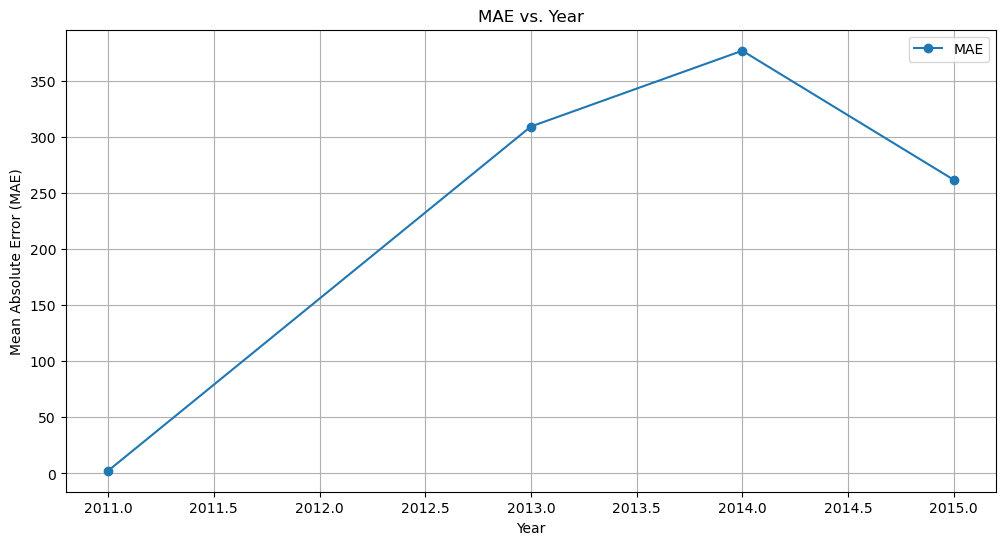

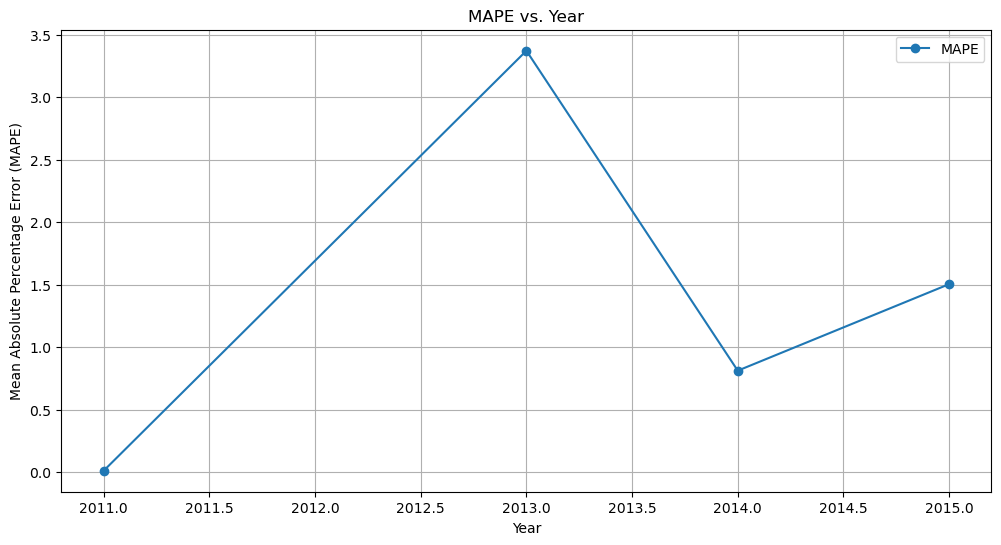

In [58]:
import matplotlib.pyplot as plt

# Calculate MAE and MAPE for each year
prophet_df['year'] = prophet_df['ds'].dt.year
years = prophet_df['year'].unique()

mae_per_year = []
mape_per_year = []

for year in years:
    yearly_data = prophet_df[prophet_df['year'] == year]
    train_size = int(len(yearly_data) * 0.8)
    train_yearly = yearly_data.iloc[:train_size]
    test_yearly = yearly_data.iloc[train_size:]
    
    model_yearly = Prophet()
    model_yearly.fit(train_yearly)
    
    future_yearly = model_yearly.make_future_dataframe(periods=len(test_yearly))
    forecast_yearly = model_yearly.predict(future_yearly)
    
    forecast_test_yearly = forecast_yearly[['ds', 'yhat']].tail(len(test_yearly))
    comparison_yearly = test_yearly[['ds', 'y']].merge(forecast_test_yearly[['ds', 'yhat']], on='ds')
    
    mae_yearly = mean_absolute_error(comparison_yearly['y'], comparison_yearly['yhat'])
    mape_yearly = mean_absolute_percentage_error(comparison_yearly['y'], comparison_yearly['yhat'])
    
    mae_per_year.append(mae_yearly)
    mape_per_year.append(mape_yearly)

# Create a DataFrame for plotting
metrics_df = pd.DataFrame({
    'year': years,
    'MAE': mae_per_year,
    'MAPE': mape_per_year
})

# Plot MAE vs. Year
plt.figure(figsize=(12, 6))
plt.plot(metrics_df['year'], metrics_df['MAE'], marker='o', label='MAE')
plt.xlabel('Year')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Year')
plt.legend()
plt.grid(True)
plt.show()

# Plot MAPE vs. Year
plt.figure(figsize=(12, 6))
plt.plot(metrics_df['year'], metrics_df['MAPE'], marker='o', label='MAPE')
plt.xlabel('Year')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.title('MAPE vs. Year')
plt.legend()
plt.grid(True)
plt.show()

Please enter the time period for which you want the prediction (in number of days) : 999
          ds        yhat  yhat_lower  yhat_upper
0 2011-01-08  217.415079   93.521818  357.110952
1 2011-01-11  237.233868  111.777810  373.819631
2 2011-01-12  297.302632  159.369800  424.241667
3 2011-01-13  255.644387  131.066579  382.711622
4 2011-01-17  261.565616  122.221274  398.197590


C:\Users\Lenovo\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Lenovo\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


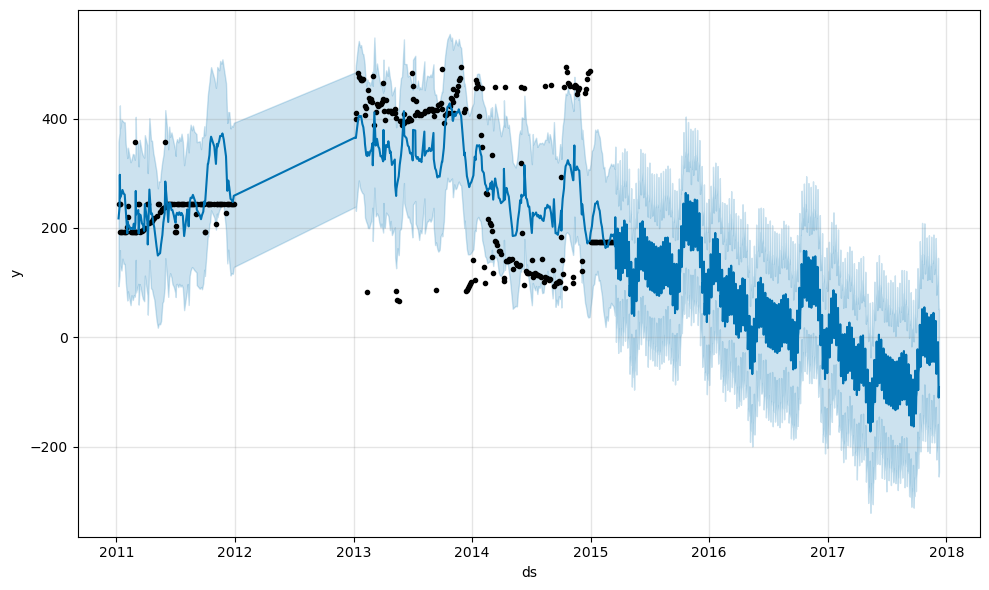

C:\Users\Lenovo\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Lenovo\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\Lenovo\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

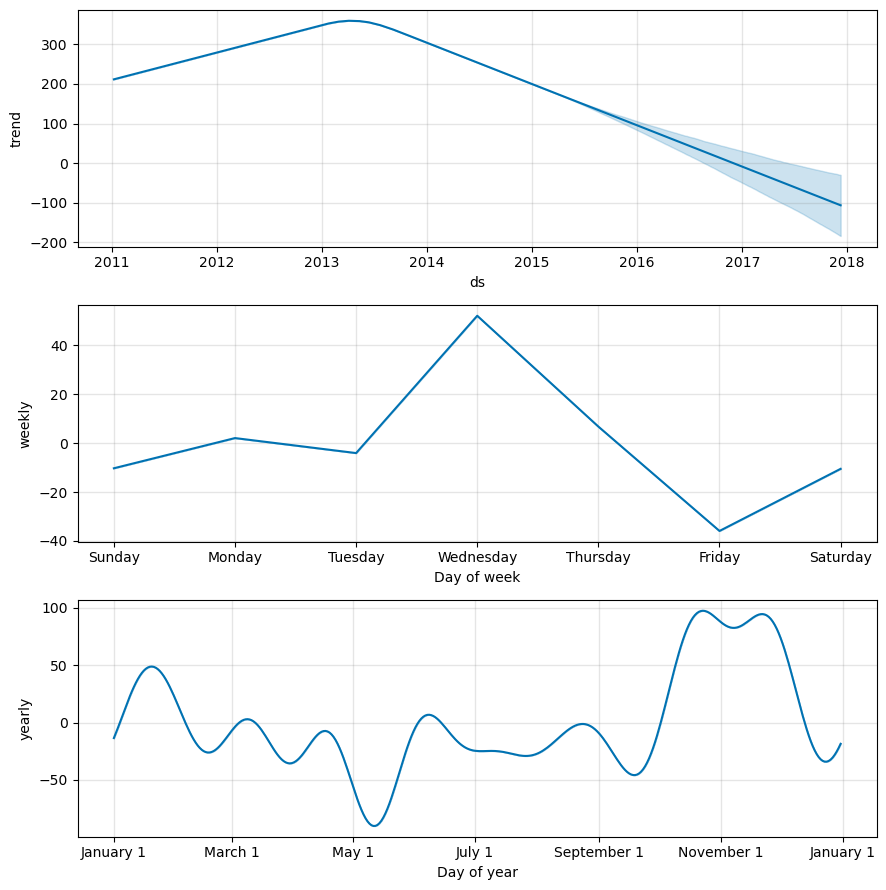

In [59]:
                                 # Interactive Prediction

# Ask user for input
user_time = input("Please enter the time period for which you want the prediction (in number of days) : ")

# Determine the data type of the input
data_type = determine_data_type(user_time)


if data_type == 'integer' and int(user_time)>=0 :
    # Create a future DataFrame for predictions 
    future1 = model.make_future_dataframe(periods=int(user_time))

    # Make predictions
    forecast1 = model.predict(future1)

    # Display the forecast
    print(forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

    # Plot the forecast
    fig1 = model.plot(forecast1)
    plt.show()

    # Plot the forecast components
    fig2 = model.plot_components(forecast1)
    plt.show()
    

else :
    print("Please enter a valid number greater than 0!")